https://www.kaggle.com/c/dogs-vs-cats/data

In [2]:
import os, shutil
original_dataset_dir = 'data'

In [2]:
base_dir = 'cats_and_dogs_small'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [3]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [4]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [5]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

In [6]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [7]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [8]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [9]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
names = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add( layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)) )
model.add(layers.MaxPooling2D((2, 2)) )
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)) )
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)) )
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)) )
model.add(layers.Flatten() )
model.add(layers.Dense(512, activation='relu') )
model.add(layers.Dense(1, activation='sigmoid') )

In [16]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [19]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 1500 images belonging to 2 classes.


In [20]:
history = model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=10,
validation_data=validation_generator,
validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 50 steps
Epoch 1/10
10/10 [==============================] - 24s 2s/step - loss: 0.7302 - acc: 0.5000 - val_loss: 0.6928 - val_acc: 0.5260
Epoch 2/10
10/10 [==============================] - 22s 2s/step - loss: 0.6916 - acc: 0.5800 - val_loss: 0.6646 - val_acc: 0.6650
Epoch 3/10
10/10 [==============================] - 24s 2s/step - loss: 0.6928 - acc: 0.5400 - val_loss: 0.6623 - val_acc: 0.6670
Epoch 4/10
10/10 [==============================] - 28s 3s/step - loss: 0.6802 - acc: 0.5350 - val_loss: 0.6288 - val_acc: 0.6630
Epoch 5/10
10/10 [==============================] - 24s 2s/step - loss: 0.6940 - acc: 0.5150 - val_loss: 0.6838 - val_acc: 0.6030
Epoch 6/10
10/10 [==============================] - 22s 2s/step - loss: 0.6887 - acc: 0.5250 - val_loss: 0.6760 - val_acc: 0.6690
Epoch 7/10
10/10 [==============================] - 

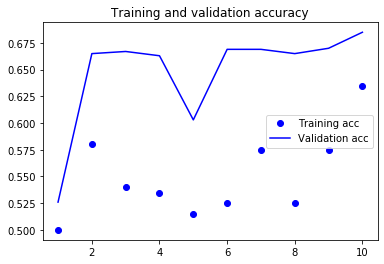

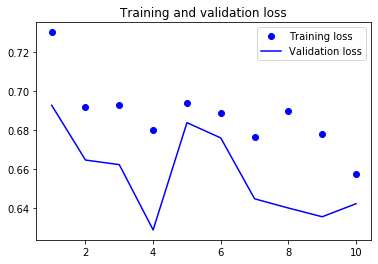

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()